Import all libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [65]:
from sklearn.metrics import r2_score

import the data

In [75]:
train_data=pd.read_csv("/content/train_IxoE5JN.csv")

In [76]:
train_data.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


Data Preprocessing

In [78]:
train_data['datetime']=pd.to_datetime(train_data['datetime'])

In [79]:
train_data['year']=train_data['datetime'].dt.year
train_data['month']=train_data['datetime'].dt.month
train_data['day']=train_data['datetime'].dt.day

In [80]:
del train_data['datetime']

In [81]:
train_data.head()

,row_id,energy,year,month,day
0,1,1259.985563,2008,3,1
1,2,1095.541500,2008,3,1
2,3,1056.247500,2008,3,1
3,4,1034.742000,2008,3,1
4,5,1026.334500,2008,3,1


In [82]:
del train_data['row_id']

In [98]:
train_data['energy']=train_data['energy'].fillna(train_data['energy'].mean())

In [99]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94306 entries, 0 to 94991
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   energy  94306 non-null  float64
 1   year    94306 non-null  int64  
 2   month   94306 non-null  int64  
 3   day     94306 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.6 MB


In [83]:
train_data=train_data.drop_duplicates()

year
2008    9.893800e+06
2009    1.252324e+07
2010    1.230867e+07
2011    1.280378e+07
2012    1.349359e+07
2013    1.402948e+07
2014    1.601144e+07
2015    1.630689e+07
2016    1.635209e+07
2017    1.683854e+07
2018    1.745646e+07
Name: energy, dtype: float64

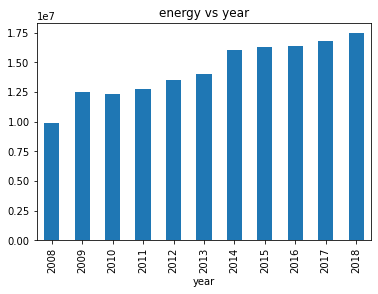

In [84]:
from pandas.plotting import boxplot
train_data.groupby('year')['energy'].sum().plot(kind='bar', title='energy vs year')
train_data.groupby('year')['energy'].sum()

In [85]:
#from the above visualization we can view that year 2018 has heighest amount of enerygy demand.

EDA

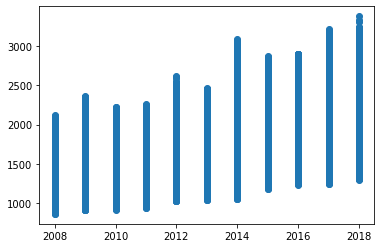

In [89]:
plt.scatter(x=train_data['year'],y=train_data['energy'])
plt.show()

In [90]:
train_data.corr()

,energy,year,month,day
energy,1.000000,0.607340,0.062074,0.004629
year,0.607340,1.000000,-0.036003,-0.001020
month,0.062074,-0.036003,1.000000,0.009866
day,0.004629,-0.001020,0.009866,1.000000


In [91]:
#year is highlighy corelated with energy, fit the model on year and energy.

Split Data

In [119]:
X=train_data.loc[:,train_data.columns!='energy']
y=train_data['energy']

Fit the model

In [120]:
xgb_model=xgb.XGBRegressor(learning_rate = 0.1, n_estimators=100, verbosity = 0)
xgb_model.fit(X,y)
xgb_pred=xgb_model.predict(X)

In [121]:
xgb_score=r2_score(y,xgb_pred)
xgb_score

0.5799214035895601

Read test data

In [123]:
test_data=pd.read_csv("/content/test_WudNWDM.csv")

In [124]:
test_data['datetime']=pd.to_datetime(test_data['datetime'])

In [125]:
test_data['year']=test_data['datetime'].dt.year
test_data['month']=test_data['datetime'].dt.month
test_data['day']=test_data['datetime'].dt.day

In [126]:
test_data.head()

,row_id,datetime,year,month,day
0,94993,2019-01-01 00:00:00,2019,1,1
1,94994,2019-01-01 01:00:00,2019,1,1
2,94995,2019-01-01 02:00:00,2019,1,1
3,94996,2019-01-01 03:00:00,2019,1,1
4,94997,2019-01-01 04:00:00,2019,1,1


In [127]:
del test_data['row_id']
del test_data['datetime']

In [130]:
X_test=test_data

In [131]:
y_test=xgb_model.predict(X_test)